Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import time 

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [6]:
df.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15
354368,20/03/2016 19:41,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,20/03/2016 00:00,0,40764,24/03/2016 12:45


The dataset contains 354,369 rows and 16 columns. There are 7 integer columns and 9 object columns. There are several columns with missing values, but we will handle them later. 

The statistical summary provides key insights into the distribution and potential issues in the numerical columns of the dataset. The mean price is 4416.66 in dollars. The standard deviation for the price in dollars is 4514.16 and suggests a large variation in car prices. The minimum and maximum values for the registration year are unrealistic indicating that there are entry errors or outliers. Power has a very wide range, with an exceptionally high maximum. The mileage column appears more consistent than other columns. The registration months are January through December. The number of pictures provide no useful information. The postal code has a wide range, reflecting the diverse geographical areas in the dataset.

The first and last five rows have been displayed.

## Data preparation

In [7]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
display(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

,Missing Values,Percentage
NotRepaired,71154,20.079070
VehicleType,37490,10.579368
FuelType,32895,9.282697
Gearbox,19833,5.596709
Model,19705,5.560588


In [8]:
# Handle missing values by filling in with mode
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 299


In [10]:
# Handle duplicates
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape of the dataset: {df.shape}")

Duplicates removed. New shape of the dataset: (354070, 16)


In [11]:
# Drop columns with date strings 
df = df.drop(columns=['DateCrawled', 'DateCreated', 'LastSeen'])

# First few rows to see non-numeric data
display(df.head())

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures,PostalCode
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,0,70435
1,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes,0,66954
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,0,90480
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,0,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,0,60437


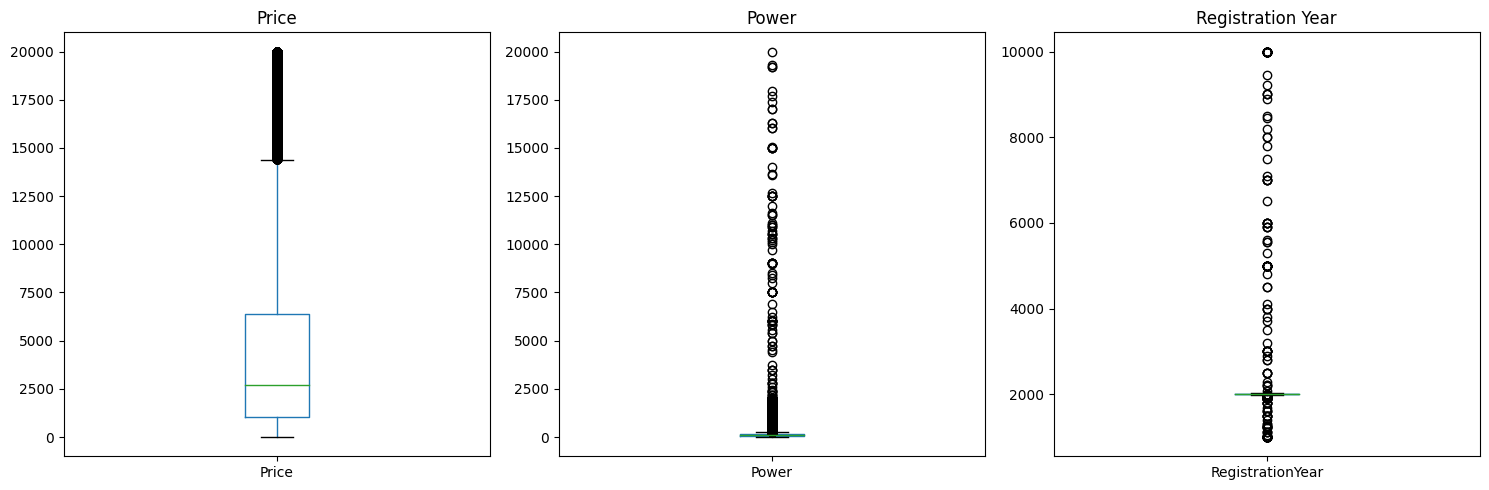

In [12]:
# Plot distribution for Price, Power, and RegistrationYear to identify outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df['Price'].plot(kind='box', title='Price')
plt.subplot(1, 3, 2)
df['Power'].plot(kind='box', title='Power')
plt.subplot(1, 3, 3)
df['RegistrationYear'].plot(kind='box', title='Registration Year')
plt.tight_layout()
plt.show()

The boxplot for price will show a high concentration of data points in the lower price ranges, with outliers extending to the right. These could be luxury or highly-priced vehicles but may also indicate errors or rare data points that don’t represent typical pricing.

This boxplot for power shows a central clustering around the mean or median with a long tail toward higher values. Cars with an engine power of 0 will show up at the lower whisker or beyond, potentially indicating missing or placeholder values for certain listings.

The boxplot for registration year might reveal two types of outliers: low end outliers and high end outliers. The low end could represent unrealistic dates while the high end are either values well into the future or extreme upper outliers. Most data points are likely clustered around the 2000s. 

## Model training

In [13]:
# Select features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Handle categorical features
categorical_features = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'NotRepaired', 'Model']

# One-hot encoding for simpler categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [14]:
# Fill numeric columns with the median
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Fill categorical columns with the most frequent value
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Verify no columns with incorrect data
display(X.dtypes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RegistrationYear     int64
Power                int64
Mileage              int64
RegistrationMonth    int64
NumberOfPictures     int64
                     ...  
Model_yaris          uint8
Model_yeti           uint8
Model_ypsilon        uint8
Model_z_reihe        uint8
Model_zafira         uint8
Length: 309, dtype: object

In [15]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling to numerical columns only
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [16]:
# Linear Regression
start_train = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
end_train = time.time()

start_predict = time.time()
y_pred = lin_reg.predict(X_test)
end_predict = time.time()

rmse_lin = mean_squared_error(y_test, y_pred, squared=False)
print(f'Linear Regression RMSE: {rmse_lin}')
print(f'Linear Regression Training Time: {end_train - start_train:.4f} seconds')
print(f'Linear Regression Prediction Time: {end_predict - start_predict:.4f} seconds')

Linear Regression RMSE: 3233.1854066233973
Linear Regression Training Time: 11.2091 seconds
Linear Regression Prediction Time: 0.1368 seconds


In [17]:
# Decision Tree Regressor
start_train = time.time()
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
end_train = time.time()

start_predict = time.time()
y_pred = tree_reg.predict(X_test)
end_predict = time.time()

rmse_tree = mean_squared_error(y_test, y_pred, squared=False)
print(f'Decision Tree RMSE: {rmse_tree}')
print(f'Decision Tree Training Time: {end_train - start_train:.4f} seconds')
print(f'Decision Tree Prediction Time: {end_predict - start_predict:.4f} seconds')

Decision Tree RMSE: 2256.4958439206616
Decision Tree Training Time: 6.8457 seconds
Decision Tree Prediction Time: 0.0876 seconds


In [18]:
# Random Forest Regressor
start_train = time.time()
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
end_train = time.time()

start_predict = time.time()
y_pred = forest_reg.predict(X_test)
end_predict = time.time()

rmse_forest = mean_squared_error(y_test, y_pred, squared=False)
print(f'Random Forest RMSE: {rmse_forest}')
print(f'Random Forest Training Time: {end_train - start_train:.4f} seconds')
print(f'Random Forest Prediction Time: {end_predict - start_predict:.4f} seconds')

Random Forest RMSE: 1703.0018831429434
Random Forest Training Time: 423.0945 seconds
Random Forest Prediction Time: 3.3920 seconds


In [19]:
# LightGBM 

# Prepare LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Parameters
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f'LightGBM RMSE: {rmse_lgb}')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 283256, number of used features: 291
[LightGBM] [Info] Start training from score 4415.325804
LightGBM RMSE: 1939.1921616652849


In [20]:
# CatBoost

cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
print(f'CatBoost RMSE: {rmse_cat}')

CatBoost RMSE: 1767.7136955400765


In [ ]:
# XGBoost

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'XGBoost RMSE: {rmse_xgb}')

## Model analysis

In [ ]:
# Hyperparameter tuning and measuring time for LightGBM 
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Run GridSearchCV to find the best model
grid_search = GridSearchCV(LGBMRegressor(random_state=42), param_grid, scoring='neg_root_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Retrieve the best estimator and retrain it to measure time
best_lgb = grid_search.best_estimator_

start_train = time.time()
best_lgb.fit(X_train, y_train)  # Retrain on the full training data
end_train = time.time()

start_predict = time.time()
y_pred = best_lgb.predict(X_test)
end_predict = time.time()

rmse_lgb = mean_squared_error(y_test, y_pred, squared=False)
print(f'LightGBM RMSE: {rmse_lgb}')
print(f'LightGBM Training Time: {end_train - start_train:.4f} seconds')
print(f'LightGBM Prediction Time: {end_predict - start_predict:.4f} seconds')

# Conclusion

This project aimed to build and compare various regression models to predict car prices using a dataset containing vehicle characteristics. The primary goal was to evaluate the performance of different models, including linear regression, decision tree, random forest, LightGBM, CatBoost, and XGBoost, using the RMSE metric, as well as to assess their computational efficiency in terms of training and prediction time.

Linear regression served as a baseline model and, as expected, had one of the higher RMSE scores, indicating that a simple linear approach was insufficient for capturing the complex relationships in the data. Tree-based models, such as decision tree and random forest, showed significant improvements over linear regression, with random forest performing better due to its ensemble nature.

We measured training and prediction times for each model. LightGBM and CatBoost, the gradient boosting models, outperformed both linear regression and individual tree models in terms of RMSE while also offering efficient training times after hyperparameter tuning. These findings align with expectations, as gradient boosting methods are often well-suited to structured data like this and benefit from specialized optimizations within libraries like LightGBM and CatBoost.

In conclusion, this project demonstrated that ensemble methods, particularly gradient boosting models like LightGBM and CatBoost, can effectively capture the complexities of structured datasets such as car listings. LightGBM, especially, balanced accuracy with computational efficiency, making it a strong choice for future predictive modeling tasks.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed